# Orbital Dynamics - Usage (Julia)

In [43]:
include("orbital_dynamics.jl");

## Two-Body Problem

In [33]:
# constants and initial conditions
m1 = 1.0e26
m2 = 1.0e26

t0 = 0.0
tf = 480.0

r1_x = 0.0
r1_y = 0.0
r1_z = 0.0

r2_x = 3000.0e3
r2_y = 0.0
r2_z = 0.0

v1_x = 10.0e3
v1_y = 20.0e3
v1_z = 30.0e3

v2_x = 0.0
v2_y = 40.0e3
v2_z = 0.0

S0 = [r1_x, r1_y, r1_z, v1_x, v1_y, v1_z, r2_x, r2_y, r2_z, v2_x, v2_y, v2_z]

12-element Vector{Float64}:
     0.0
     0.0
     0.0
 10000.0
 20000.0
 30000.0
     3.0e6
     0.0
     0.0
     0.0
 40000.0
     0.0

In [34]:
s_out, t_out = two_body_propagator(t0, tf, m1, m2, S0, tolerance=500.0);

In [35]:
x1 = s_out[1]
y1 = s_out[2]
z1 = s_out[3]

vx1 = s_out[4]
vy1 = s_out[5]
vz1 = s_out[6]

x2 = s_out[7]
y2 = s_out[8]
z2 = s_out[9]

vx2 = s_out[10]
vy2 = s_out[11]
vz2 = s_out[12];

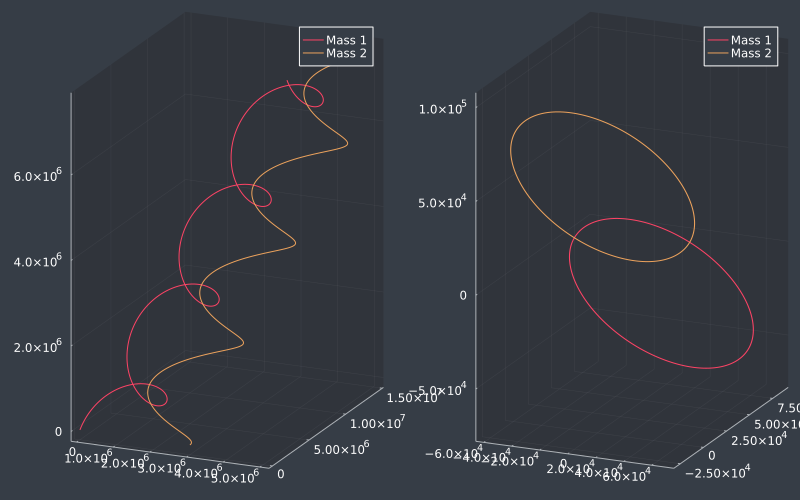

In [36]:
using Plots, PlotThemes
theme(:dark)

plot(x1, y1, z1, label="Mass 1")
pos_plot = plot!(x2, y2, z2, label="Mass 2")

plot(vx1, vy1, vz1, label="Mass 1")
vel_plot = plot!(vx2, vy2, vz2, label="Mass 2")

plot(pos_plot, vel_plot, layout=(1,2), size=(800, 500))

## Circular-Restricted Three-Body Problem

In [37]:
x = -4671.0
y = -6378.0 - 200.0
z = 0.0

v_x = 10.9148 * cos(deg2rad(20))
v_y = -10.9148 * sin(deg2rad(20))
v_z = 0.0

S0 = [x, y, z, v_x, v_y, v_z]

6-element Vector{Float64}:
 -4671.0
 -6578.0
     0.0
    10.256557017354034
    -3.7330814603710087
     0.0

In [45]:
s_out_3b, t_out_3b = three_body_cr_propagator(t0, 
                                              3.16689 * 24 * 60 * 60, 
                                              5.974e24, 
                                              73.48e21,
                                              384400.0,
                                              S0,
                                              grav_constant=6.6759e-20,
                                              tolerance=10);

In [47]:
x_out = s_out_3b[1]
y_out = s_out_3b[2]
z_out = s_out_3b[3];

In [54]:
# https://discourse.julialang.org/t/plot-a-circle-with-a-given-radius-with-plots-jl/23295/6
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end

circle (generic function with 1 method)

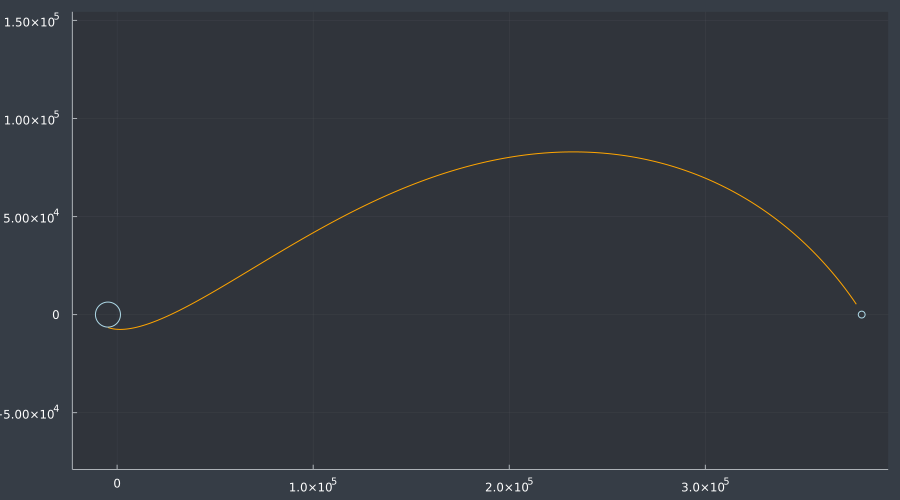

In [68]:
plot(x_out, y_out, aspect_ratio=:equal, c = :orange)
plot!(circle(-4671, 0, 6378), c = :lightblue)
plot!(circle(-4671 + 384400, 0, 1737), c = :lightblue, size=(900, 500), legend=false)